In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_train = pd.read_csv('/content/drive/MyDrive/trainset.csv')

In [6]:
dataset_train.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2013,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,03-01-2013,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,04-01-2013,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,07-01-2013,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,08-01-2013,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [8]:
train_set = dataset_train.iloc[:,1:2].values


In [9]:
type(train_set)


numpy.ndarray

In [10]:
train_set.shape


(1259, 1)

In [11]:

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [12]:
training_set_scaled.shape


(1259, 1)

In [13]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [14]:
X_train.shape


(1199, 60)

In [15]:
length = 60
n_features = 1


In [16]:
model = Sequential()
model.add(layers.SimpleRNN(50,input_shape=(60,1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 8s 58ms/step - loss: 0.0081
Epoch 2/100
38/38 [==============================] - 1s 37ms/step - loss: 7.2270e-04
Epoch 3/100
38/38 [==============================] - 1s 38ms/step - loss: 5.6831e-04
Epoch 4/100
38/38 [==============================] - 1s 37ms/step - loss: 4.2346e-04
Epoch 5/100
38/38 [==============================] - 1s 37ms/step - loss: 3.8132e-04
Epoch 6/100
38/38 [==============================] - 1s 35ms/step - loss: 3.4572e-04
Epoch 7/100
38/38 [==============================] - 1s 36ms/step - loss: 3.1050e-04
Epoch 8/100
38/38 [==============================] - 2s 40ms/step - loss: 2.8810e-04
Epoch 9/100
38/38 [==============================] - 3s 69ms/step - loss: 2.9103e-04
Epoch 10/100
38/38 [==============================] - 3s 66ms/step - loss: 2.9459e-04
Epoch 11/100
38/38 [==============================] - 2s 50ms/step - loss: 2.5383e-04
Epoch 12/100
38/38 [==============================] - 1s 35ms/step 

In [22]:
dataset_test = pd.read_csv('/content/testset.csv')


In [23]:
test_set = dataset_test.iloc[:,1:2].values

In [24]:
test_set.shape

(125, 1)

In [25]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)


In [26]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [27]:
X_test.shape

(1324, 60, 1)

In [28]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 1s 10ms/step


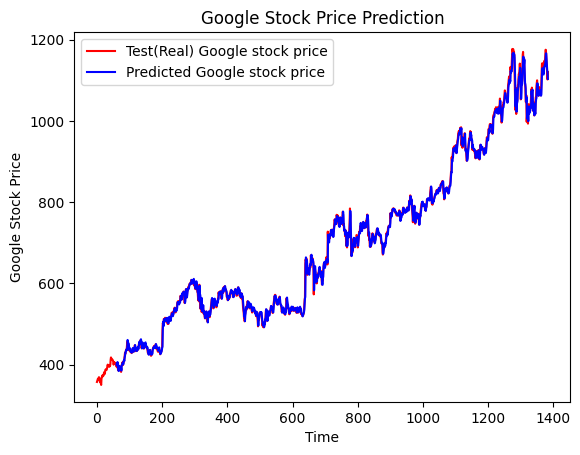

In [29]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

537829.4403517968